In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [5]:
X_train_scaled=X_train.copy()
X_train_scaled['age']=X_train_scaled['age']/100

X_test_scaled=X_test.copy()
X_test_scaled['age']=X_test_scaled['age']/100

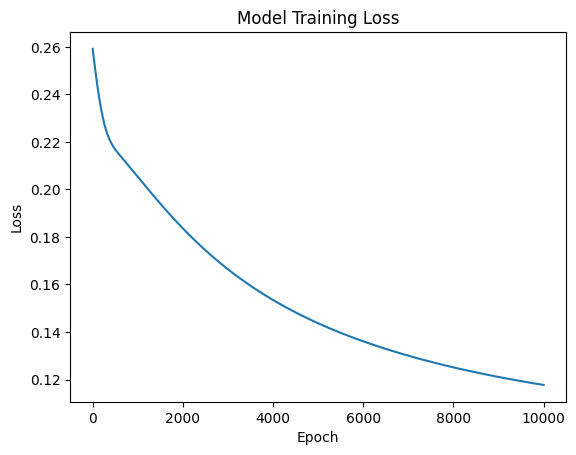

In [6]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])
model.compile(optimizer='Adam',
             loss='MeanSquaredError',
             metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=10000,verbose=0)
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()